<a href="https://colab.research.google.com/github/plaban1981/Object-Detection-Yolo/blob/master/cvlib_Yolo_Object_Detection_in_Seconds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## cvlib

cvlib is a simple, easy-to-use, high level, open-source Computer Vision library for Python. The library was developed with a focus on enabling easy and fast experimentation. **Most of the Guided principles that cvlib has are heavily inspired by the famous Keras library(deep learning library used on top of TensorFlow).**

A few of these principles are:

* simplicity
* user-friendliness
* modularity and
* extensibility

## Installation

Provided the below python packages are installed, cvlib is completely pip installable.

* OpenCV
* Tensorflow

In [1]:
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.2 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=4a739063e37ff467df6d20c2b2511bd468ae64bc654369f8374ae00f5ddce55d
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=d7388fb446039163e0dcc4049180a5dff03a7f4005ec09dc69aa1ad855ac98d9
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


## Face detection

In [3]:
!wget "https://thumbs.dreamstime.com/z/three-girls-three-different-face-expression-friendship-people-pajama-party-concept-happy-friends-teenage-girls-having-111832531.jpg"

--2022-10-09 06:13:57--  https://thumbs.dreamstime.com/z/three-girls-three-different-face-expression-friendship-people-pajama-party-concept-happy-friends-teenage-girls-having-111832531.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98296 (96K) [image/jpeg]
Saving to: ‘three-girls-three-different-face-expression-friendship-people-pajama-party-concept-happy-friends-teenage-girls-having-111832531.jpg’

three-girls-three-d 100%[===================>]  95.99K  --.-KB/s    in 0.01s   

2022-10-09 06:13:57 (6.60 MB/s) - ‘three-girls-three-different-face-expression-friendship-people-pajama-party-concept-happy-friends-teenage-girls-having-111832531.jpg’ saved [98296/98296]



In [45]:
import cv2
import cvlib as cv
import numpy as np
image = cv2.imread("/content/three-girls-three-different-face-expression-friendship-people-pajama-party-concept-happy-friends-teenage-girls-having-111832531.jpg")
faces, confidences = cv.detect_face(image) 

In [30]:
faces

[[583, 180, 759, 425], [863, 197, 1031, 430], [194, 158, 360, 363]]

In [31]:
confidences

[0.99997663, 0.9998629, 0.57427764]

## Visualize face detection images using opencv

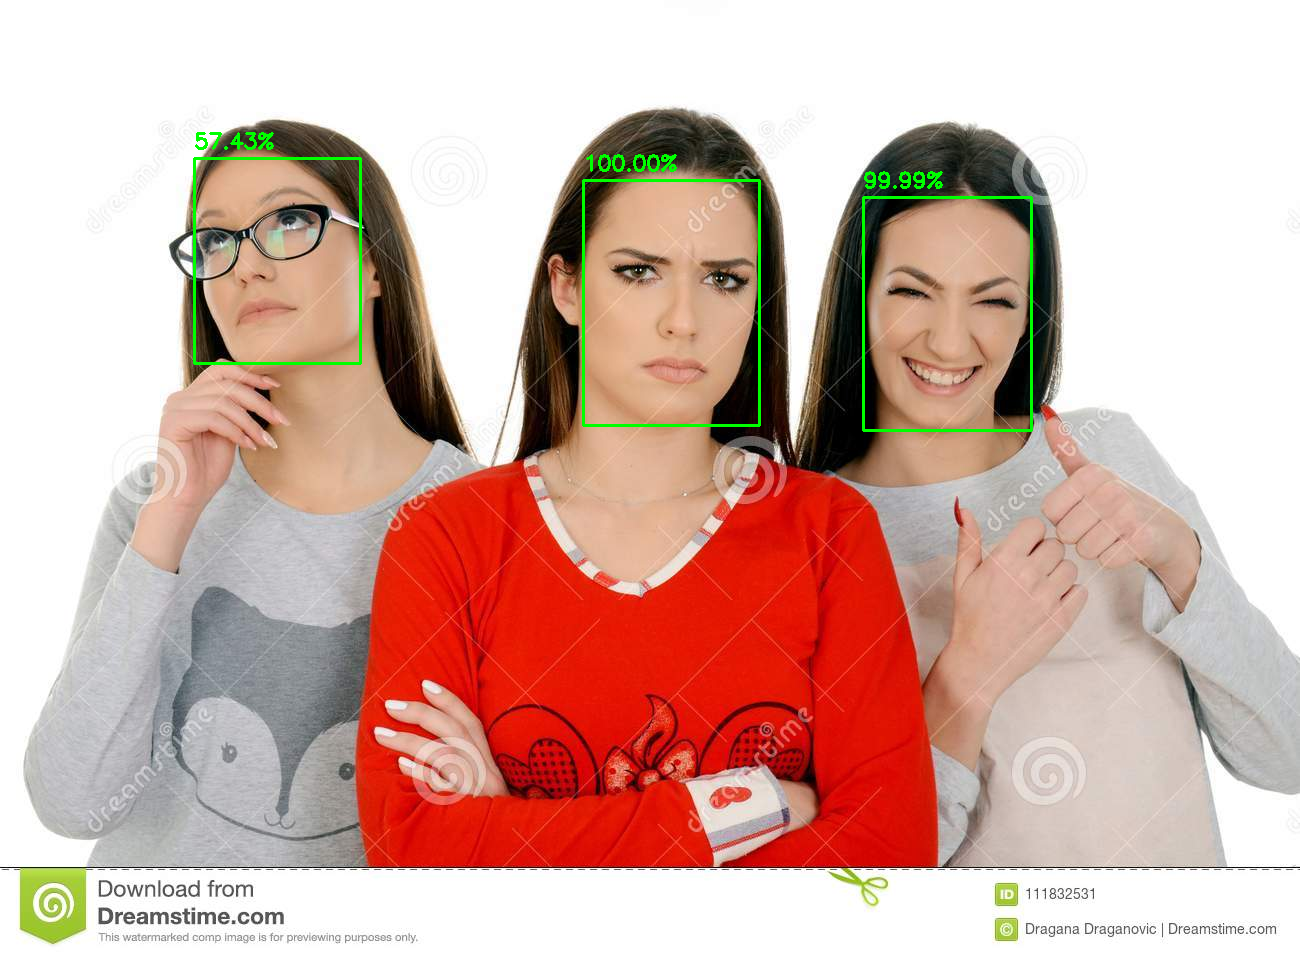

In [46]:
from google.colab.patches import cv2_imshow
# loop through detected faces
for face,conf in zip(faces,confidences):

    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)
    label = "{:.2f}%".format(conf * 100)
    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(image, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)
cv2_imshow(image)

## save output


In [47]:
cv2.imwrite("face_detection.jpg", image)

True

## Draw bounding boxes on an image in PyTorch

tensor([[ 583,  180,  759,  425],
        [ 863,  197, 1031,  430],
        [ 194,  158,  360,  363]], dtype=torch.int32)
torch.Size([3, 4])


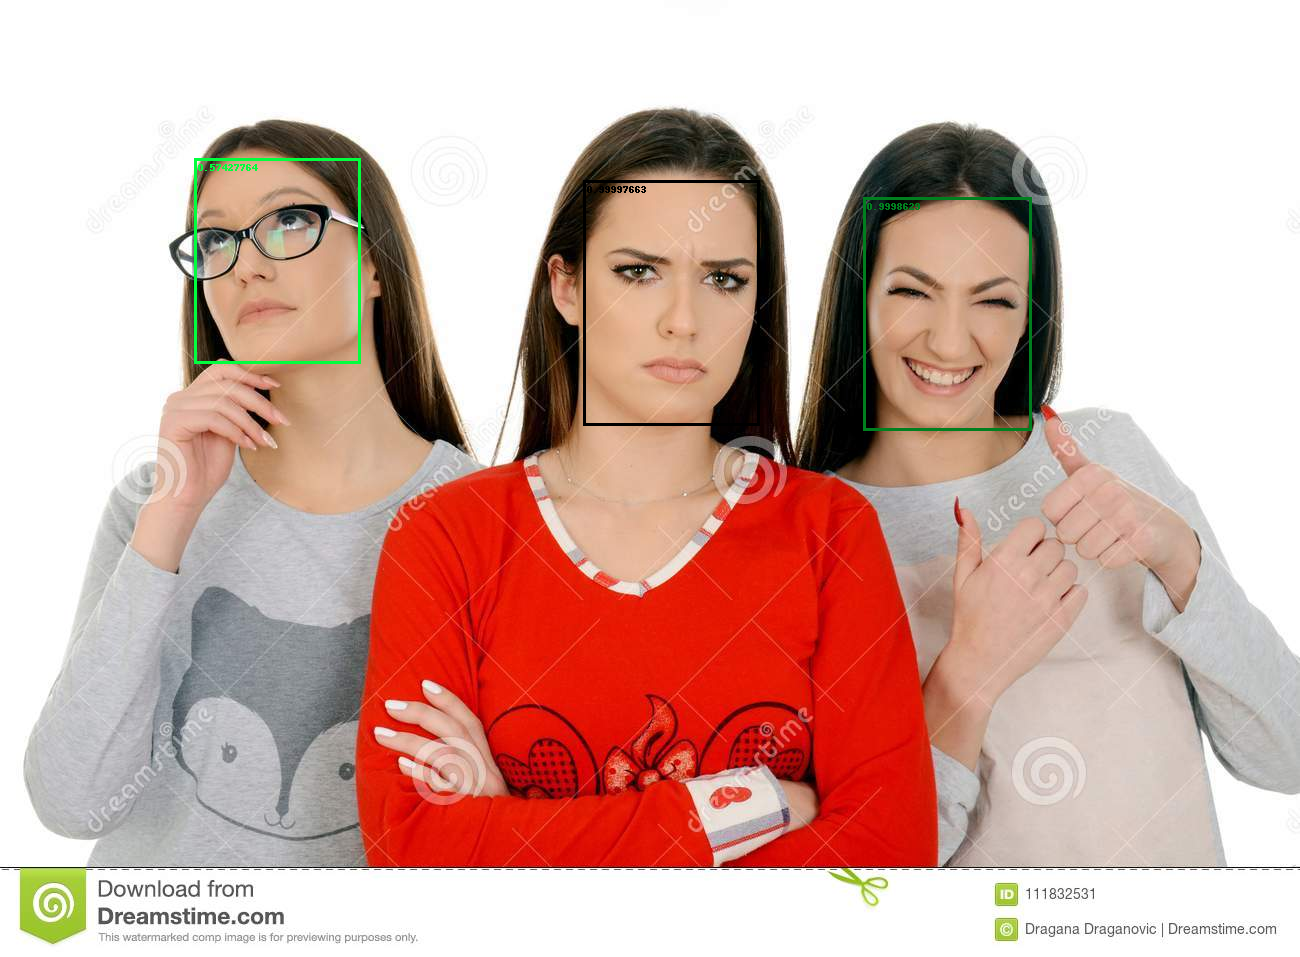

In [37]:
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
img = read_image('/content/three-girls-three-different-face-expression-friendship-people-pajama-party-concept-happy-friends-teenage-girls-having-111832531.jpg')
bbox = torch.tensor(faces, dtype=torch.int)
print(bbox)
print(bbox.size())
lbl = [str(cf) for cf in confidences]
# draw bounding boxes on the input image
img=draw_bounding_boxes(img, bbox,labels = lbl,width=3)
img = torchvision.transforms.ToPILImage()(img)
img

## Gender Detection

* Once face is detected, it can be passed on to detect_gender() function to recognize gender. 
* It will return the labels (man, woman) and associated probabilities.

In [42]:
for face,conf in zip(faces,confidences):

    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)
    face_crop = np.copy(image[startY:endY, startX:endX])

    # apply gender detection
    (label, confidence) = cv.detect_gender(face_crop)

    print(confidence)
    print(label)

    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(image, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)


[0.99630046 0.00369946]
['male', 'female']
[0.7905769  0.20942311]
['male', 'female']
[0.3924667 0.6075333]
['male', 'female']


#### Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

#### Parameters:
* **image**: It is the image on which text is to be drawn.
* **text**: Text string to be drawn.
* **org**: It is the coordinates of the bottom-left corner of the text string in the image. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
* **font**: It denotes the font type. Some of font types are FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, , etc.
* **fontScale**: Font scale factor that is multiplied by the font-specific base size.
* **color**: It is the color of text string to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color.
* **thickness**: It is the thickness of the line in px.
* **lineType**: This is an optional parameter.It gives the type of the line to be used.
* **bottomLeftOrigin**: This is an optional parameter. When it is true, the image data origin is at the bottom-left corner. Otherwise, it is at the top-left corner.

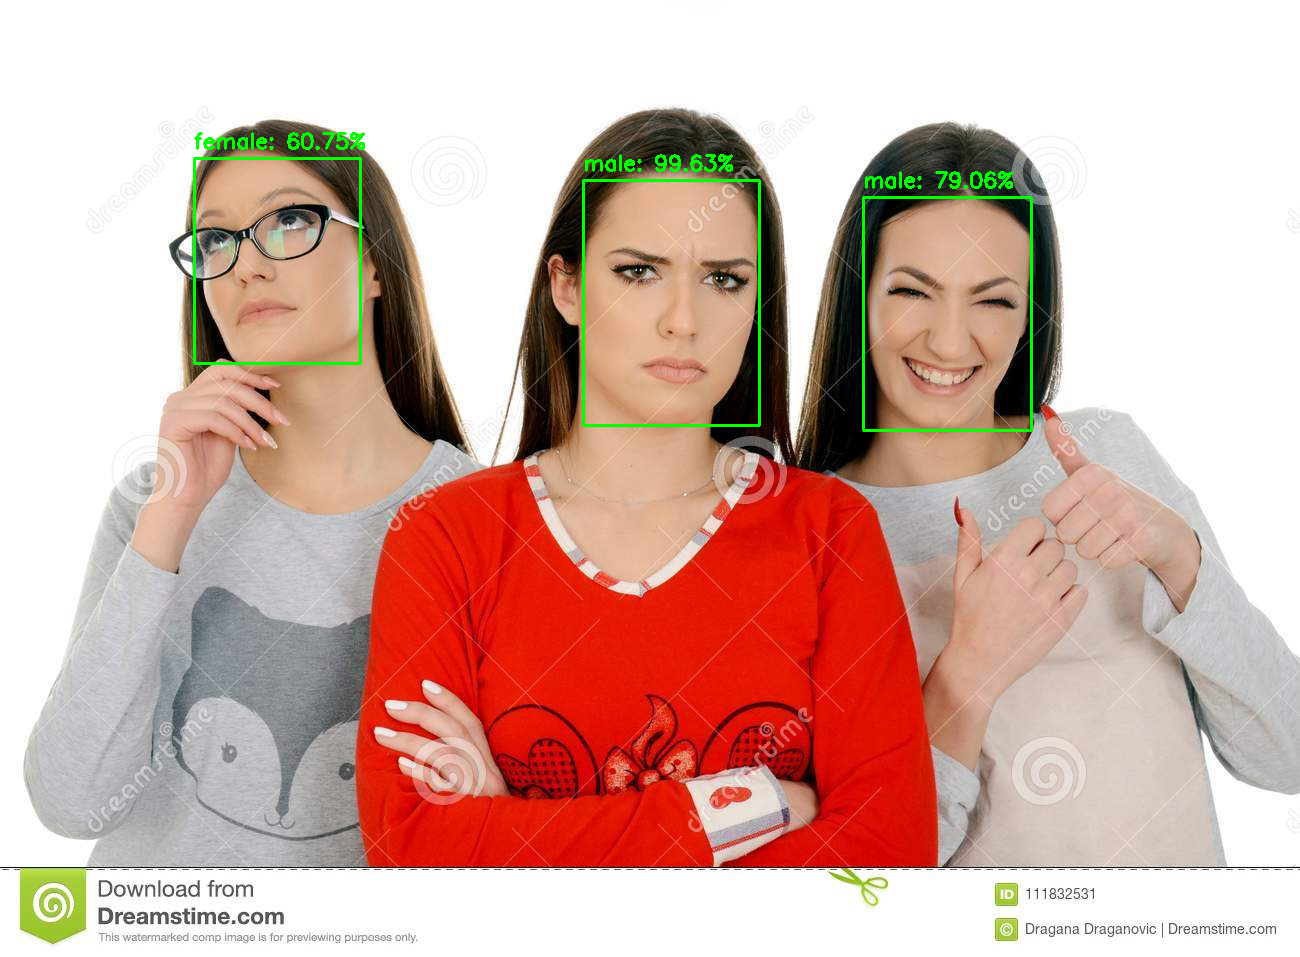

In [43]:
cv2_imshow(image)

## Object Detection using cvlib

In [54]:
!wget https://www.iihs.org/media/23a6c599-71ba-4d57-909c-cee62905e328/ga6CCw/Status%20Report/45-10/story-4-main-image.jpg

--2022-10-09 10:50:24--  https://www.iihs.org/media/23a6c599-71ba-4d57-909c-cee62905e328/ga6CCw/Status%20Report/45-10/story-4-main-image.jpg
Resolving www.iihs.org (www.iihs.org)... 172.67.16.206, 104.20.173.79, 104.20.172.79, ...
Connecting to www.iihs.org (www.iihs.org)|172.67.16.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297756 (291K) [image/jpeg]
Saving to: ‘story-4-main-image.jpg’

story-4-main-image. 100%[===================>] 290.78K  1.73MB/s    in 0.2s    

2022-10-09 10:50:34 (1.73 MB/s) - ‘story-4-main-image.jpg’ saved [297756/297756]



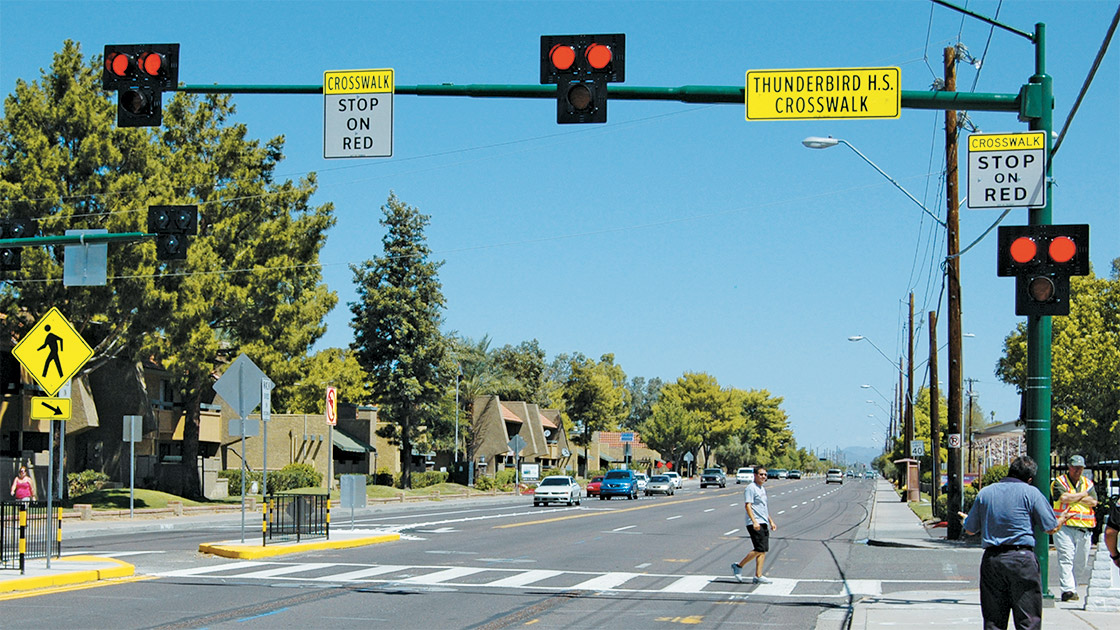

In [55]:
image = cv2.imread("/content/story-4-main-image.jpg")
cv2_imshow(image)

In [56]:
# import necessary packages
import cvlib as cv
import cv2
from cvlib.object_detection import draw_bbox
# apply object detection
bbox, label, conf = cv.detect_common_objects(image)

print(bbox, label, conf)

# draw bounding box over detected objects
out = draw_bbox(image, bbox, label, conf)

[[968, 457, 1057, 629], [541, 31, 624, 124], [731, 466, 774, 581], [532, 476, 579, 508], [824, 471, 844, 483], [103, 43, 177, 127], [699, 466, 726, 487], [775, 469, 800, 479], [598, 470, 637, 500], [1048, 458, 1100, 600], [642, 474, 676, 496], [994, 222, 1089, 278], [732, 467, 752, 482]] ['person', 'traffic light', 'person', 'car', 'car', 'traffic light', 'car', 'car', 'car', 'person', 'car', 'traffic light', 'car'] [0.9955678582191467, 0.986333966255188, 0.980908989906311, 0.9607056379318237, 0.9155279397964478, 0.9065165519714355, 0.8890355229377747, 0.8488156199455261, 0.8464000821113586, 0.8286918997764587, 0.7284528017044067, 0.707533597946167, 0.6250352263450623]


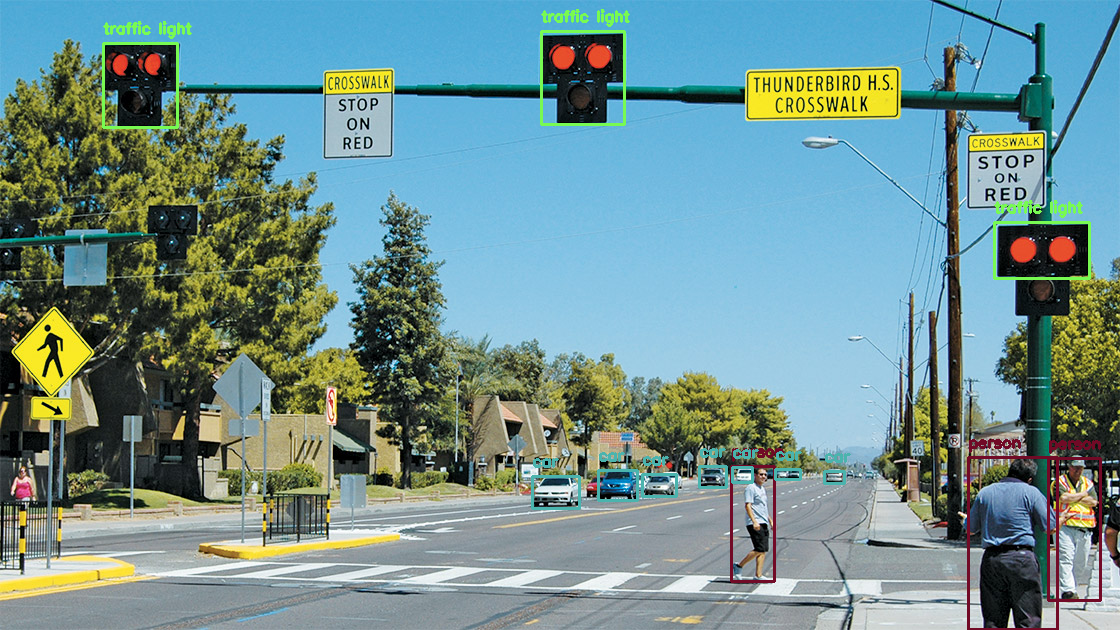

In [57]:
cv2_imshow(out)